**Clustering avec Kmeans**

Les données à regrouper

In [4]:
import pandas as pd

df_employes=pd.DataFrame([[1200,25],
                 [1300,27],
                 [1100,27],
                 [2500,49],
                 [2400,47],
                 [2600,45]], 
                 columns=['salaire','age'])

Apprentissage avec Kmeans

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_employes)

KMeans(n_clusters=2)

Test avec donénes de test

In [6]:
employe_new=pd.DataFrame([[1300.67,28]], columns=['salaire','age'])
employe_new

,salaire,age
0,1300.67,28


In [7]:
#
kmeans.predict(employe_new)
kmeans.cluster_centers_


array([[1200.        ,   26.33333333],
       [2500.        ,   47.        ]])

**Clustering des données réelles**

In [27]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
data_path='/content/drive/MyDrive/Colab Notebooks/irm2/employes.csv'

In [35]:
data_path="./data/employes (1).csv"

Charger les données CSV employes.csv à partir de Google Drive

In [36]:
#
df_employes=pd.read_csv(data_path, index_col=0, header=0)
df_employes

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675,100.560,celibataire,20/10/2018
Sonia,2800.786,400.876,marie,30/11/2005
Rahma,NaN,130.987,celibataire,04/02/2017
Salma,2500.876,340.600,marie,03/02/2010
Ahmed,3100.760,NaN,marie,09/09/2004
Saleh,1300.876,150.900,celibataire,01/01/2017
Ameni,1100.660,130.870,celibataire,11/05/2019
Mehdi,3000.760,NaN,marie,07/07/2000
Salem,1505.760,159.700,celibataire,21/11/2017


Transformer les données de format brute en format numérique

In [37]:
df_ = df_employes.copy()
df_

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675,100.560,celibataire,20/10/2018
Sonia,2800.786,400.876,marie,30/11/2005
Rahma,NaN,130.987,celibataire,04/02/2017
Salma,2500.876,340.600,marie,03/02/2010
Ahmed,3100.760,NaN,marie,09/09/2004
Saleh,1300.876,150.900,celibataire,01/01/2017
Ameni,1100.660,130.870,celibataire,11/05/2019
Mehdi,3000.760,NaN,marie,07/07/2000
Salem,1505.760,159.700,celibataire,21/11/2017


In [38]:
# fill missing values
df_.fillna({'salaire':df_['salaire'].mean(),'prime':df_['prime'].mean()}, inplace=True)
df_


,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675000,100.560000,celibataire,20/10/2018
Sonia,2800.786000,400.876000,marie,30/11/2005
Rahma,2192.082091,130.987000,celibataire,04/02/2017
Salma,2500.876000,340.600000,marie,03/02/2010
Ahmed,3100.760000,257.165889,marie,09/09/2004
Saleh,1300.876000,150.900000,celibataire,01/01/2017
Ameni,1100.660000,130.870000,celibataire,11/05/2019
Mehdi,3000.760000,257.165889,marie,07/07/2000
Salem,1505.760000,159.700000,celibataire,21/11/2017


In [39]:
df_['date recrutement']=pd.to_datetime(df_['date recrutement'])
df_

/tmp/ipykernel_77336/2022768527.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_['date recrutement']=pd.to_datetime(df_['date recrutement'])


,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675000,100.560000,celibataire,2018-10-20
Sonia,2800.786000,400.876000,marie,2005-11-30
Rahma,2192.082091,130.987000,celibataire,2017-04-02
Salma,2500.876000,340.600000,marie,2010-03-02
Ahmed,3100.760000,257.165889,marie,2004-09-09
Saleh,1300.876000,150.900000,celibataire,2017-01-01
Ameni,1100.660000,130.870000,celibataire,2019-11-05
Mehdi,3000.760000,257.165889,marie,2000-07-07
Salem,1505.760000,159.700000,celibataire,2017-11-21


In [40]:
from datetime import datetime
df_['anciennete']=df_['date recrutement'].apply(lambda x: datetime.now().year-x.year)
df_

,salaire,prime,etat civil,date recrutement,anciennete
nom,,,,,
Ali,1200.675000,100.560000,celibataire,2018-10-20,4
Sonia,2800.786000,400.876000,marie,2005-11-30,17
Rahma,2192.082091,130.987000,celibataire,2017-04-02,5
Salma,2500.876000,340.600000,marie,2010-03-02,12
Ahmed,3100.760000,257.165889,marie,2004-09-09,18
Saleh,1300.876000,150.900000,celibataire,2017-01-01,5
Ameni,1100.660000,130.870000,celibataire,2019-11-05,3
Mehdi,3000.760000,257.165889,marie,2000-07-07,22
Salem,1505.760000,159.700000,celibataire,2017-11-21,5


In [41]:
df_.drop(['date recrutement'], axis=1, inplace=True,errors='ignore')
df_

,salaire,prime,etat civil,anciennete
nom,,,,
Ali,1200.675000,100.560000,celibataire,4
Sonia,2800.786000,400.876000,marie,17
Rahma,2192.082091,130.987000,celibataire,5
Salma,2500.876000,340.600000,marie,12
Ahmed,3100.760000,257.165889,marie,18
Saleh,1300.876000,150.900000,celibataire,5
Ameni,1100.660000,130.870000,celibataire,3
Mehdi,3000.760000,257.165889,marie,22
Salem,1505.760000,159.700000,celibataire,5


In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()
ohe.fit(df_[['etat civil']])

OneHotEncoder()

In [43]:
ohe.categories_

[array(['celibataire', 'marie'], dtype=object)]

In [44]:
etat_civil_sparse= ohe.transform(df_[['etat civil']])
etat_civil=etat_civil_sparse.toarray()
etat_civil

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [45]:
df_etat_civil=pd.DataFrame(etat_civil, index=df_.index, columns=['etat civil celib', 'etat civil marie'])

In [46]:
df_=pd.concat([df_, df_etat_civil], axis=1)

In [47]:
df_.drop(['etat civil'], axis=1, inplace=True,errors='ignore')

In [48]:
df_

,salaire,prime,anciennete,etat civil celib,etat civil marie
nom,,,,,
Ali,1200.675000,100.560000,4,1.0,0.0
Sonia,2800.786000,400.876000,17,0.0,1.0
Rahma,2192.082091,130.987000,5,1.0,0.0
Salma,2500.876000,340.600000,12,0.0,1.0
Ahmed,3100.760000,257.165889,18,0.0,1.0
Saleh,1300.876000,150.900000,5,1.0,0.0
Ameni,1100.660000,130.870000,3,1.0,0.0
Mehdi,3000.760000,257.165889,22,0.0,1.0
Salem,1505.760000,159.700000,5,1.0,0.0


Normaliser les données

In [49]:
from sklearn.preprocessing import  StandardScaler
ss=StandardScaler()
ss.fit(df_)
df_ss=ss.transform(df_)
df_ss

array([[-1.1511497 , -1.26411237, -0.97166562,  1.        , -1.        ],
       [ 0.70678264,  1.1600185 ,  0.48583281, -1.        ,  1.        ],
       [ 0.        , -1.01850764, -0.85955036,  1.        , -1.        ],
       [ 0.358549  ,  0.67347462, -0.07474351, -1.        ,  1.        ],
       [ 1.0550906 ,  0.        ,  0.59794807, -1.        ,  1.        ],
       [-1.0348036 , -0.85777122, -0.85955036,  1.        , -1.        ],
       [-1.26727984, -1.01945206, -1.08378088,  1.        , -1.        ],
       [ 0.93897789,  0.        ,  1.04640913, -1.        ,  1.        ],
       [-0.79690722, -0.7867382 , -0.85955036,  1.        , -1.        ],
       [ 0.59014045,  1.15294749,  1.15852439, -1.        ,  1.        ],
       [-1.15079556,  0.        , -0.63531983,  1.        , -1.        ],
       [ 1.75139534,  1.96014087,  2.05544651, -1.        ,  1.        ]])

In [23]:
from sklearn.preprocessing import  StandardScaler
ss=StandardScaler()
ss.fit(X_)
X_ss=ss.transform(X_)
X_ss

NameError: name 'X_' is not defined

Réduire les dimensions des données

In [50]:
# reduce dimension
# to determine target dimension we calculate inertia


from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df_ss)
df_pca=pca.transform(df_ss)
df_pca

array([[-2.40254573, -0.21260843],
       [ 1.94104291,  0.13336802],
       [-1.73359756, -0.29367583],
       [ 1.32591667, -0.29059585],
       [ 1.65300564, -0.84805555],
       [-2.12706805,  0.10410078],
       [-2.40068748, -0.01507993],
       [ 1.80315582, -0.71309448],
       [-1.99062368,  0.09796294],
       [ 2.18893613,  0.31516948],
       [-1.71255885,  0.86438558],
       [ 3.45502417,  0.85812327]])

Regrouper les données clusters avec Kmeans

In [51]:
# regroup data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_pca)

KMeans(n_clusters=2)

Prédire les labels des clusters

In [52]:
# predict labels
kmeans.predict(df_pca)

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int32)

Déterminer les clusters

In [53]:
# determine clusters
kmeans.cluster_centers_

array([[-2.06118022,  0.09084752],
       [ 2.06118022, -0.09084752]])

In [54]:
# cluster0
cluster0=df_pca[kmeans.labels_==0]

In [55]:
# cluster1
cluster1=df_pca[kmeans.labels_==1]

Visualiser les données sur un plan 2D colorées selon leurs appartenances aux clusters

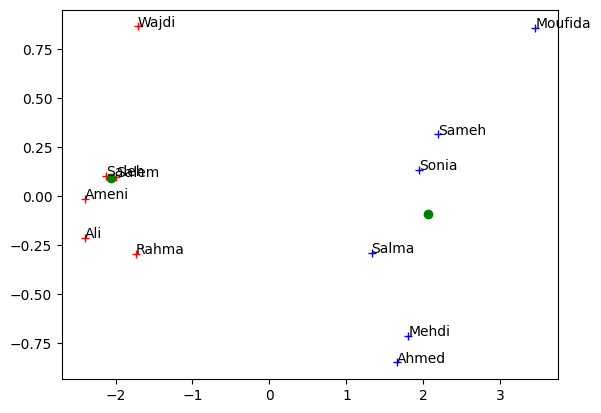

In [56]:
import matplotlib.pyplot as plt

plt.plot(cluster0[:,0],cluster0[:,1],'r+', label='Cluster 0')
plt.plot(cluster1[:,0],cluster1[:,1],'b+', label='Cluster 1')
# show centers
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'go', label='Centers')

for nom, x, y in zip(df_employes.index,df_pca[:,0],df_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")

# Projection d'un nouveau employé sur le plan 2D

In [57]:
import pandas as pd

In [58]:
new = pd.DataFrame([[3500.44,600,"marie","09/12/1990"]], index=['Moufid'] , columns=df_employes.columns)

In [60]:
df_new_ = new.copy()
df_new_.fillna({'salaire':df_['salaire'].mean(),'prime':df_['prime'].mean()}, inplace=True)
df_new_['date recrutement']=pd.to_datetime(df_new_['date recrutement'])
from datetime import datetime
df_new_['anciennete']=df_new_['date recrutement'].apply(lambda x: datetime.now().year-x.year)
df_new_.drop(['date recrutement'], axis=1, inplace=True,errors='ignore')
etat_civil_sparse= ohe.transform(df_new_[['etat civil']])
etat_civil=etat_civil_sparse.toarray()
df_etat_civil=pd.DataFrame(etat_civil, index=df_new_.index, columns=['etat civil celib', 'etat civil marie'])
df_new_=pd.concat([df_new_, df_etat_civil], axis=1)
df_new_.drop(['etat civil'], axis=1, inplace=True,errors='ignore')
df_new_ss_= ss.transform(df_new_)
df_new_pca_= pca.transform(df_new_ss_)

label_new=kmeans.predict(df_new_pca_)


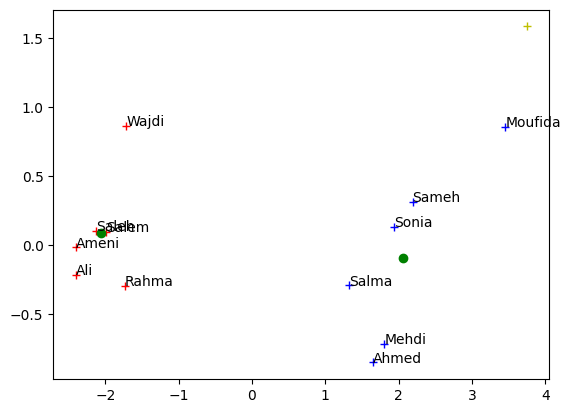

In [64]:
import matplotlib.pyplot as plt

plt.plot(cluster0[:,0],cluster0[:,1],'r+', label='Cluster 0')
plt.plot(cluster1[:,0],cluster1[:,1],'b+', label='Cluster 1')
# show centers
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'go', label='Centers')

for nom, x, y in zip(df_employes.index,df_pca[:,0],df_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")

plt.plot(df_new_pca_[:,0],df_new_pca_[:,1],'y+', label='new employe')